<a href="https://colab.research.google.com/github/olgabernier/Machine-Learning/blob/master/ML_Exercice_sante_des_indiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import tensorflow
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header = None)

In [0]:
df.columns = ['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)','Class variable (0 or 1)']

In [0]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.shape

(768, 9)

In [0]:
var_x = np.array(df.iloc[: , 0:8], dtype = int)
var_x.shape
# sinon: df.to_numpy

(768, 8)

In [0]:
var_y = np.array(df.iloc[:,8], dtype = int)
var_y.shape

(768,)

In [0]:
from  keras import models, layers
from  keras import Sequential
from  keras import utils
from keras.layers import Dense, Input

In [0]:
keras.backend.clear_session()

In [0]:
model = Sequential()

In [0]:
# Définition de la couche d'entrée (input_shape, 8 variables = 8 colonnes), n de neurones = 64:
model.add(Dense(units=20, activation='relu', input_shape=(8,))) # couche d'entrée (inout_shape) + couche cachée (units = n de neurones)
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid')) # couche de sortie

In [0]:
# définition de la couche de sortie (units = nombre de neurones, 1 = le nombre de réponse: OUI ou NON, 1 ou 0):


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


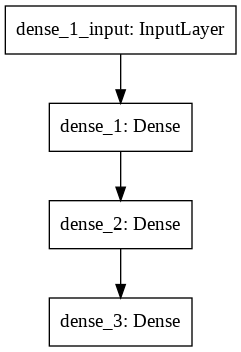

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
# Adagrad
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])

In [0]:
#model.fit(var_x, var_y, epochs=5, batch_size=50)
history = model.fit(var_x, var_y, epochs=200,validation_split=0.1)

Train on 691 samples, validate on 77 samples
Epoch 1/200
691/691 [==============================] - 0s 540us/step - loss: 1.0854 - acc: 0.3430 - mean_squared_error: 0.4110 - val_loss: 0.8946 - val_acc: 0.4026 - val_mean_squared_error: 0.3360
Epoch 2/200
691/691 [==============================] - 0s 55us/step - loss: 0.7991 - acc: 0.3444 - mean_squared_error: 0.2981 - val_loss: 0.7741 - val_acc: 0.4156 - val_mean_squared_error: 0.2871
Epoch 3/200
691/691 [==============================] - 0s 55us/step - loss: 0.7094 - acc: 0.5789 - mean_squared_error: 0.2571 - val_loss: 0.7140 - val_acc: 0.5195 - val_mean_squared_error: 0.2599
Epoch 4/200
691/691 [==============================] - 0s 50us/step - loss: 0.6720 - acc: 0.6425 - mean_squared_error: 0.2393 - val_loss: 0.6869 - val_acc: 0.5584 - val_mean_squared_error: 0.2468
Epoch 5/200
691/691 [==============================] - 0s 46us/step - loss: 0.6505 - acc: 0.6512 - mean_squared_error: 0.2289 - val_loss: 0.6783 - val_acc: 0.5974 - val_m

In [0]:
history.history['acc']


[0.34298118720351356,
 0.34442836477511524,
 0.5788712016752936,
 0.6425470330263184,
 0.6512301010436846,
 0.6454413892046242,
 0.6454413886008146,
 0.649782923817117,
 0.6497829236446,
 0.6512301012162016,
 0.651230100612392,
 0.6584659920932587,
 0.6642547026384411,
 0.6628075246355468,
 0.6888567301540403,
 0.6917510857285363,
 0.6874095511160435,
 0.6960926196940901,
 0.6859623732856662,
 0.690303907725642,
 0.6888567292914549,
 0.6859623737169589,
 0.6888567286876452,
 0.6874095518923703,
 0.6888567296796183,
 0.6787264826673847,
 0.6859623732856662,
 0.6917510861598289,
 0.6888567289464208,
 0.6917510851247266,
 0.6888567297227476,
 0.6931982631276209,
 0.6917510846934339,
 0.697539797136304,
 0.694645441734325,
 0.7018813317056675,
 0.7264833577980009,
 0.7163531117777403,
 0.7250361797951065,
 0.7192474679560461,
 0.7221418237893178,
 0.7235890017490828,
 0.7206946451826137,
 0.7293777142350822,
 0.7293777142350822,
 0.7235890017922121,
 0.7279305347657928,
 0.7337192467773702

# Nouvelle section

In [0]:
loss,accuracy, mse = model.evaluate(var_x, var_y)
loss,accuracy, mse

768/768 [==============================] - 0s 34us/step


(0.4693072810769081, 0.7734375, 0.15340032428503036)

FIT: Returns

A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [0]:
#loss,accuracy = model.evaluate(var_x, var_y)

In [0]:
#loss,accuracy 

In [0]:
# https://keras.io/models/sequential/

In [0]:

import json

with open("model.json", "w") as json_file:
    json_file.write(json_model)
'''
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
'''



'\n# serialize weights to HDF5\nmodel.save_weights("model.h5")\nprint("Saved model to disk")\n'

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage de lévolution de la perte
#d1 = sns.lineplot(list(range(len(history.history['loss']))), history.history['loss'])
#d2 = sns.lineplot(list(range(len(history.history['acc']))), history.history['acc'])




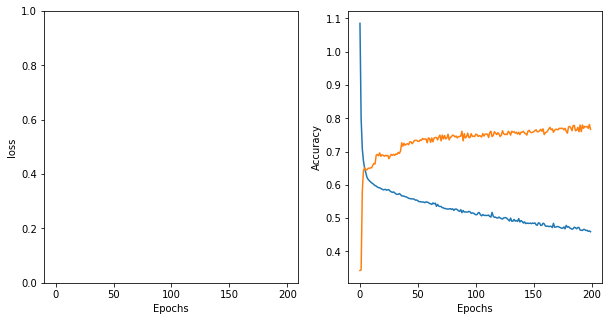

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharex = True)
ax1.plot = plt.plot(list(range(len(history.history['loss']))), history.history['loss'])
ax2.plot = plt.plot(list(range(len(history.history['acc']))), history.history['acc'])
ax1.set(xlabel='Epochs', ylabel='loss')
ax2.set(xlabel='Epochs', ylabel='Accuracy')
plt.show()

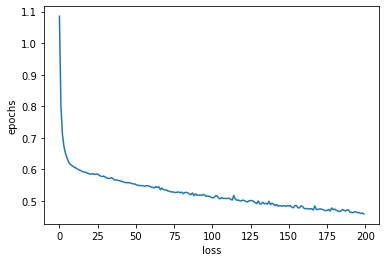

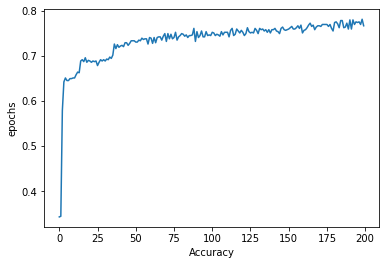

In [0]:
plt.plot(list(range(len(history.history['loss']))), history.history['loss'])
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()
plt.plot(list(range(len(history.history['acc']))), history.history['acc'])
plt.ylabel('epochs')
plt.xlabel('Accuracy')
plt.show()
